<a href="https://colab.research.google.com/github/Gowr93/DNN-NLP-Practise-Session-/blob/main/Digits_MultiClass_Classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


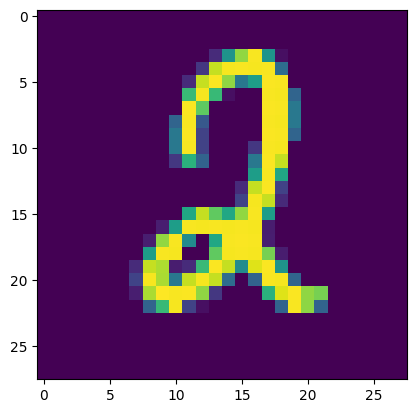

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[55100])# image show
plt.show()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# Feature scaling is required # normalization is done only by 255 only. no standardisation , normalisation is required
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train[0]

# nor -values or more than 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

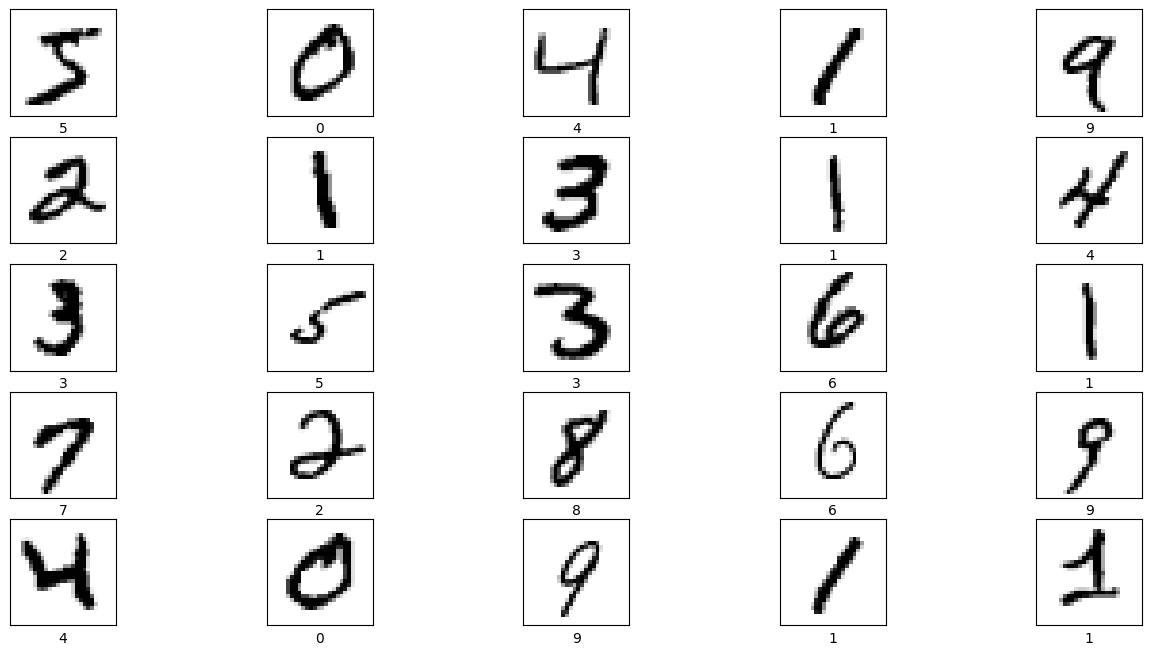

In [ ]:
# check more images # Train Data

plt.figure(figsize =(16,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(y_train[i])

plt.show()

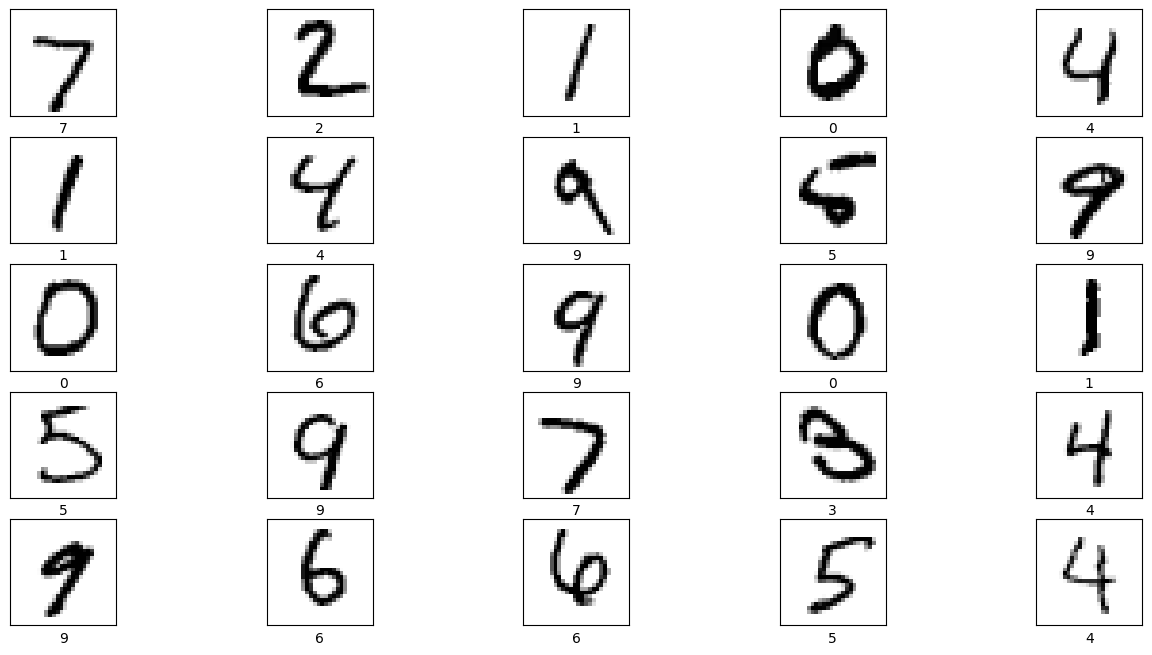

In [ ]:
# train data

plt.figure(figsize = (16,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(y_test[i])

plt.show()

In [ ]:
## Building Multilayer perceptron model
model = Sequential()
# converting image 2D to 1D - Flatten
model.add(Flatten(input_shape = (28,28)))
#first hidden layer
model.add(Dense(128,activation = 'relu'))
# second hidden layer
model.add(Dense(32,activation = 'relu'))
# output # for multiclass classification
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784*128+128


100480

In [ ]:
128*32+32

4128

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, epochs = 25, batch_size =128, validation_data=(x_test,y_test))

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7990 - loss: 0.6911 - val_accuracy: 0.9514 - val_loss: 0.1658
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9541 - loss: 0.1564 - val_accuracy: 0.9641 - val_loss: 0.1189
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9706 - loss: 0.1023 - val_accuracy: 0.9700 - val_loss: 0.0953
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9764 - loss: 0.0769 - val_accuracy: 0.9738 - val_loss: 0.0840
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9730 - val_loss: 0.0864
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9851 - loss: 0.0483 - val_accuracy: 0.9749 - val_loss: 0.0802
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.9786 - val_loss: 0.0720
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9901 - loss: 0.0334 - val_accuracy: 0.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
469*128

60032

In [ ]:
60000/128

468.75

In [ ]:
#history1 = model.fit(x_train,y_train, epochs = 25, validation_data = (x_test,y_test))
history1 = model.fit(x_train, y_train, epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9775 - val_loss: 0.1051
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9764 - val_loss: 0.1231
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9751 - val_loss: 0.1304
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9756 - val_loss: 0.1280
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9747 - val_loss: 0.1503
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9771 - val_loss: 0.1366
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9968 - loss: 0.0104 - val_accuracy: 0.9752 - val_loss: 0.1442
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9961 - loss: 0.012

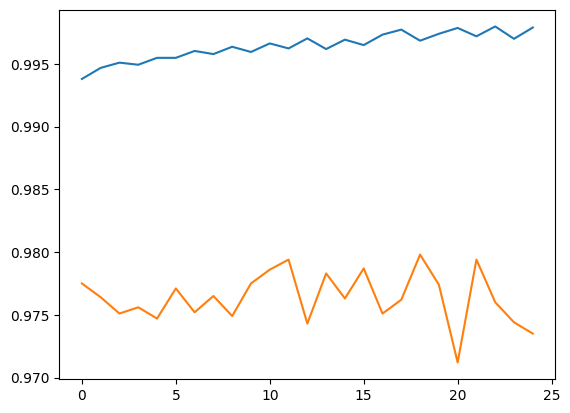

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

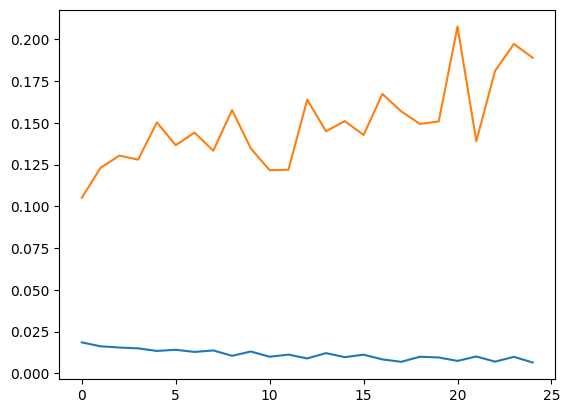

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
y_prob = model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.79586394e-23, 4.79860271e-23, 4.80176527e-25, ...,
        9.99999940e-01, 2.00644503e-24, 2.35696430e-18],
       [1.26080335e-25, 1.41120859e-18, 9.99999940e-01, ...,
        9.88414180e-30, 3.33833681e-19, 1.00877840e-36],
       [9.00595737e-17, 9.99999940e-01, 4.02115277e-12, ...,
        1.12230183e-10, 3.08587834e-12, 3.21764418e-19],
       ...,
       [6.28270874e-33, 8.18868498e-21, 0.00000000e+00, ...,
        1.87199019e-16, 1.81067209e-27, 1.57453082e-21],
       [5.10604127e-30, 2.42256970e-33, 1.26252536e-34, ...,
        3.98739119e-29, 8.79261280e-15, 1.20006838e-34],
       [3.63987521e-24, 1.53689400e-23, 1.77509639e-33, ...,
        3.66164602e-37, 3.57673034e-36, 6.19755290e-36]], dtype=float32)

In [ ]:
y_prob = y_prob.argmax(axis = 1)
y_prob

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prob)

0.9735

## Databetes Dataset Classification Problem

In [25]:
# @title Default title text
import pandas as pd
import os
import numpy as np

datasample = pd.read_csv('/content/diabetes(1).csv')
datasample.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
datasample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
datasample.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
datasample.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
datasample.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [30]:
datasample.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [31]:
datasample.duplicated().sum()

np.int64(0)

In [32]:
datasample.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
# filling the values with median
datasample['Glucose'] = np.where(datasample['Glucose']== 0 , datasample['Glucose'].median(),datasample['Glucose'])
datasample['BloodPressure'] = np.where(datasample['BloodPressure'] == 0, datasample['BloodPressure'].median(),datasample['BloodPressure'])
datasample['SkinThickness'] = np.where(datasample['SkinThickness']==0, datasample['SkinThickness'].median(),datasample['SkinThickness'])
datasample['Insulin'] = np.where(datasample['Insulin']== 0 , datasample['Insulin'].median(), datasample['Insulin'])
datasample['BMI'] = np.where(datasample['BMI'] == 0 , datasample['BMI'].median(), datasample['BMI'])

In [34]:
datasample.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0


In [35]:
# feature scaling

x = datasample.iloc[:,:-1]
y = datasample.iloc[:,-1]

In [36]:
y.value_counts()/len(y)*100

,count
Outcome,
0,65.104167
1,34.895833


In [37]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [38]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [39]:
# split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42, stratify = y)

In [41]:
x_train.shape

(614, 8)

In [45]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [46]:
from keras.layers import BatchNormalization, Dropout

## Model Building - MLP DNN

In [ ]:
dnn = Sequential()
dnn.add(Dense(32,activation = 'relu', input_dim = 8))
dnn.add(BatchNormalization())
dnn.add(Dense(16,activation = 'relu'))
dnn.add(BatchNormalization())
dnn.add(Dense(1, activation = 'sigmoid'))
dnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
dnn = Sequential()
dnn.add(Dense(32,activation = 'relu', input_dim = 8))
#dnn.add(BatchNormalization())
dnn.add(Dropout(0.25))
dnn.add(Dense(16,activation = 'relu'))
dnn.add(Dropout(0.50))
dnn.add(Dense(1, activation = 'sigmoid'))
dnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
dnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = dnn.fit(x_train_sc, y_train, epochs = 50 , validation_data=(x_test_sc, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5620 - loss: 0.6906 - val_accuracy: 0.7013 - val_loss: 0.6500
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6393 - loss: 0.6897 - val_accuracy: 0.7208 - val_loss: 0.6204
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6863 - loss: 0.6378 - val_accuracy: 0.7013 - val_loss: 0.5930
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6613 - loss: 0.6319 - val_accuracy: 0.7013 - val_loss: 0.5695
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7306 - loss: 0.5703 - val_accuracy: 0.7143 - val_loss: 0.5526
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5702 - val_accuracy: 0.7078 - val_loss: 0.5415
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7320 - loss: 0.5293 - val_accuracy: 0.7208 - val_loss: 0.5322
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7487 - loss: 0.5147 - val_accuracy: 0.7143 - val_loss

## New Project on CIFAR 10 Small images Classification

In [13]:
(x_train, y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

 92012544/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

KeyboardInterrupt: 

In [44]:
print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [ ]:
https://www.kaggle.com/code/minhbtnguyen/multi-layer-perceptron-on-cifar10-visualization
check out do it

IndexError: index 55100 is out of bounds for axis 0 with size 50000

### New Topic Practise Session

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras import Sequential

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


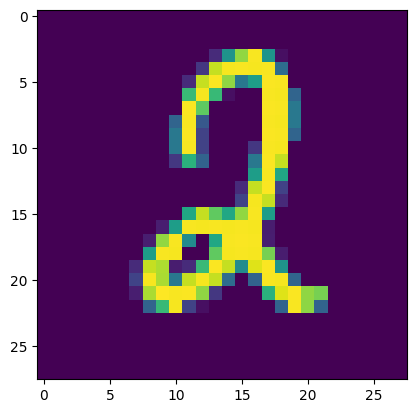

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[55100])
plt.show()

In [15]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
# Feature Scaling is required
x_train = x_train/255.0
x_test = x_test / 255.0

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

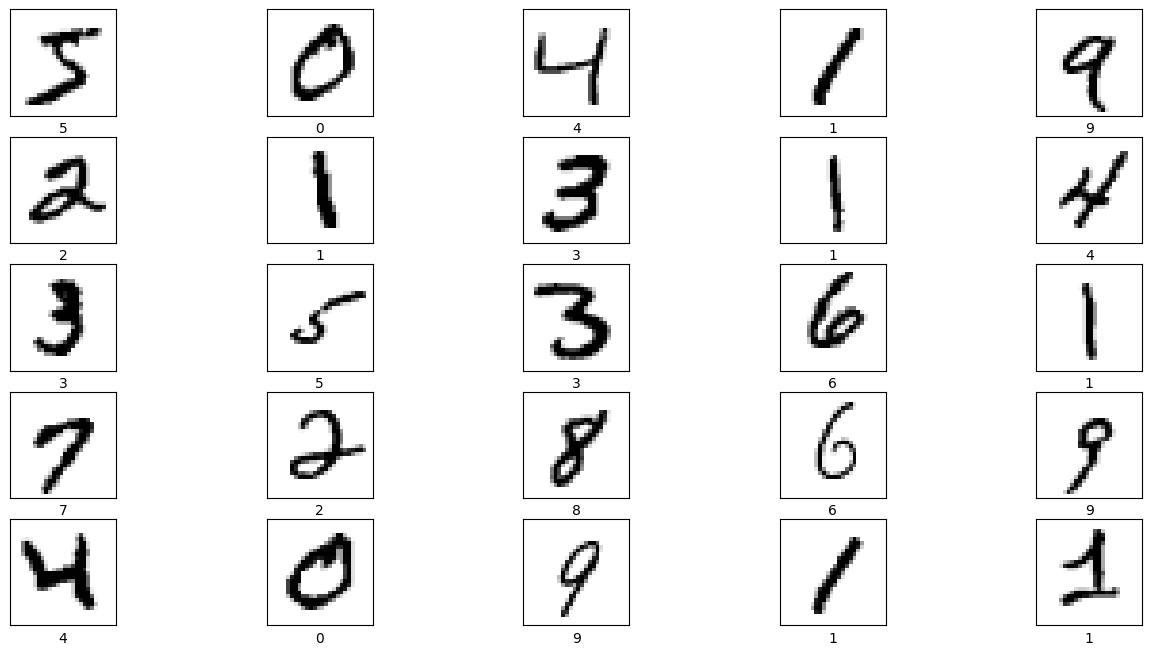

In [19]:
# check more images

import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

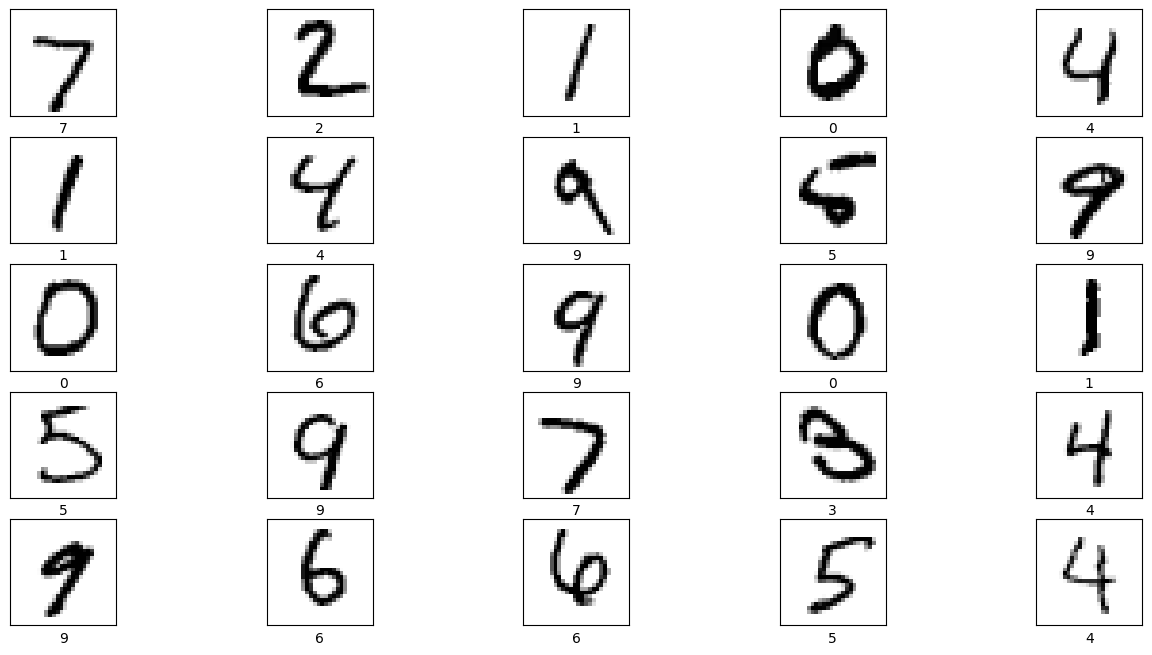

In [20]:
# check more images
plt.figure(figsize=(16,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

## Building Multilayer Perceptron Model

## Dropout

In [21]:
# Drop out
from keras.layers import Dropout


In [ ]:
model = Sequential()
# converting image 2D to 1D - Flatten
model.add(Flatten(input_shape = (28,28)))
# first hidden layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation = 'softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10 , validation_data = (x_test, y_test))
# accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9780 - val_loss: 0.0733
#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8191 - loss: 0.6875 - val_accuracy: 0.9541 - val_loss: 0.1565
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9501 - loss: 0.1714 - val_accuracy: 0.9690 - val_loss: 0.1079
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9625 - loss: 0.1239 - val_accuracy: 0.9717 - val_loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9702 - loss: 0.0998 - val_accuracy: 0.9752 - val_loss: 0.0831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9731 - loss: 0.0875 - val_accuracy: 0.9765 - val_loss: 0.0762
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9752 - loss: 0.0748 - val_accuracy: 0.9748 - val_loss: 0.0811
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9787 - loss: 0.0678 - val_accuracy: 0.9778 - val_loss: 0.0782
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9806 - loss: 0

## Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience = 10,verbose=1)
# min_delta - early stopping eeta value, learning rate
# system will check 20 times if accuracy is not find,,
# verbose -- gives at what time epoch stopped and returns , if epoc is 1000
# if it stops oin 50 , then it returns epoch = 50


In [ ]:
model = Sequential()
# converting image 2D to 1D - Flatten
model.add(Flatten(input_shape=(28,28)))
# first hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8499 - loss: 0.5039 - val_accuracy: 0.9568 - val_loss: 0.1455
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9541 - loss: 0.1564 - val_accuracy: 0.9664 - val_loss: 0.1070
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9642 - loss: 0.1175 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9713 - loss: 0.0947 - val_accuracy: 0.9747 - val_loss: 0.0807
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9735 - loss: 0.0836 - val_accuracy: 0.9774 - val_loss: 0.0779
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9786 - loss: 0.0710 - val_accuracy: 0.9786 - val_loss: 0.0775
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9786 - loss: 0.0658 - val_accuracy: 0.9787 - val_loss: 0.0713
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 

KeyboardInterrupt: 

In [ ]:
model = Sequential()
# converting image 2D to 1D - Flatten
model.add(Flatten(input_shape=(28,28)))
# first hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test,y_test), callbacks = callback) # using Earlystopping method, waits for 20 iterations, no improvement it will stop

Epoch 1/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8503 - loss: 0.5040 - val_accuracy: 0.9546 - val_loss: 0.1481
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9519 - loss: 0.1602 - val_accuracy: 0.9697 - val_loss: 0.1045
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9647 - loss: 0.1177 - val_accuracy: 0.9728 - val_loss: 0.0905
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9696 - loss: 0.0988 - val_accuracy: 0.9751 - val_loss: 0.0759
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9736 - loss: 0.0831 - val_accuracy: 0.9791 - val_loss: 0.0706
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9767 - loss: 0.0736 - val_accuracy: 0.9797 - val_loss: 0.0709
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9791 - loss: 0.0651 - val_accuracy: 0.9776 - val_loss: 0.0741
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 

## Model Building - MLP/DNN

### Gradient Descent
## 1) BGD
## 1) SGD
## 1) MBGD

## Optimizer BGD


In [47]:
import time

In [49]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras  import Sequential
import time

In [52]:
# Batch Gradient Descent
dnn = Sequential()
dnn.add(Dense(32,activation = 'relu', input_dim = 8))
dnn.add(Dropout(0.25))
dnn.add(Dense(16,activation= 'relu'))
dnn.add(Dropout(0.50))
dnn.add(Dense(1,activation = 'sigmoid'))
dnn.compile(loss = 'binary_crossentropy', metrics =['accuracy'])
start = time.time()
history = dnn.fit(x_train_sc, y_train, epochs = 10 , batch_size = 614, validation_data =(x_test_sc,y_test))
print(time.time()-start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5635 - loss: 0.6955 - val_accuracy: 0.5909 - val_loss: 0.6646
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6010 - loss: 0.6789 - val_accuracy: 0.6104 - val_loss: 0.6563
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5896 - loss: 0.6732 - val_accuracy: 0.6169 - val_loss: 0.6495
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5993 - loss: 0.6855 - val_accuracy: 0.6299 - val_loss: 0.6443
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6417 - loss: 0.6526 - val_accuracy: 0.6299 - val_loss: 0.6395
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6173 - loss: 0.6612 - val_accuracy: 0.6299 - val_loss: 0.6348
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6319 - loss: 0.6444 - val_accuracy: 0.6364 - val_loss: 0.6307
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6336 - loss: 0.6597 - val_accuracy: 0.6429 - val_loss: 0.6274
E

In [54]:
#SGD

dnn1 = Sequential()
dnn1.add(Dense(32,activation = 'relu', input_dim = 8))
dnn1.add(Dropout(0.25))
dnn1.add(Dense(16, activation = 'relu'))
dnn1.add(Dropout(0.50))
dnn1.add(Dense(1,activation ='sigmoid'))
dnn1.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
start = time.time()
history1 = dnn1.fit(x_train_sc, y_train, epochs = 10 , batch_size = 1,validation_data =(x_test_sc,y_test))
print(time.time()-start)

Epoch 1/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5349 - loss: 0.6911 - val_accuracy: 0.6948 - val_loss: 0.5445
Epoch 2/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6858 - loss: 0.5402 - val_accuracy: 0.7208 - val_loss: 0.5451
Epoch 3/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7555 - loss: 0.5025 - val_accuracy: 0.7273 - val_loss: 0.5612
Epoch 4/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7550 - loss: 0.5172 - val_accuracy: 0.7143 - val_loss: 0.5699
Epoch 5/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7940 - loss: 0.4500 - val_accuracy: 0.7403 - val_loss: 0.5756
Epoch 6/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7713 - loss: 0.5445 - val_accuracy: 0.7338 - val_loss: 0.5776
Epoch 7/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8226 - loss: 0.4617 - val_accuracy: 0.7403 - val_loss: 0.5697
Epoch 8/10
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7484 - loss: 0.5410 - val_accuracy: 0.

In [55]:
# MBGD
dnn2 = Sequential()
dnn2.add(Dense(32, activation='relu', input_dim=8))
dnn2.add(Dropout(0.25))
dnn2.add(Dense(16, activation='relu'))
dnn2.add(Dropout(0.50))
dnn2.add(Dense(1, activation='sigmoid'))
dnn2.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history2 = dnn2.fit(x_train_sc, y_train, epochs=10, batch_size=32, validation_data=(x_test_sc, y_test))
print(time.time()-start)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.6276 - loss: 0.6796 - val_accuracy: 0.6883 - val_loss: 0.6066
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6712 - loss: 0.6318 - val_accuracy: 0.6948 - val_loss: 0.5808
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6678 - loss: 0.6341 - val_accuracy: 0.6948 - val_loss: 0.5630
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6996 - loss: 0.5898 - val_accuracy: 0.7143 - val_loss: 0.5494
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7006 - loss: 0.5634 - val_accuracy: 0.7208 - val_loss: 0.5408
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6780 - loss: 0.5571 - val_accuracy: 0.7468 - val_loss: 0.5348
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7229 - loss: 0.5338 - val_accuracy: 0.7468 - val_loss: 0.5289
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7288 - loss: 0.5257 - val_accuracy: 0.7532 - val_los

#BGD
Time : 6.594370603561401

Accuracy :
accuracy: 0.6482 - loss: 0.6207 - val_accuracy: 0.6364 - val_loss: 0.6207

#SGD
Time:23.037829399108887

Accuracy:
accuracy: 0.7876 - loss: 0.4945 - val_accuracy: 0.7403 - val_loss: 0.5958


# MBGD
Time:7.582146883010864

Accuracy:
accuracy: 0.6894 - loss: 0.5837 - val_accuracy: 0.7273 - val_loss: 0.5212

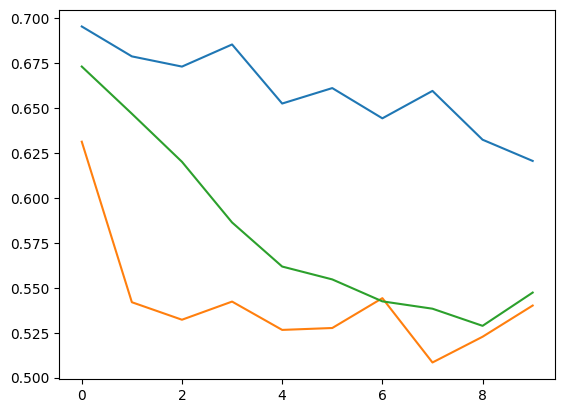

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])

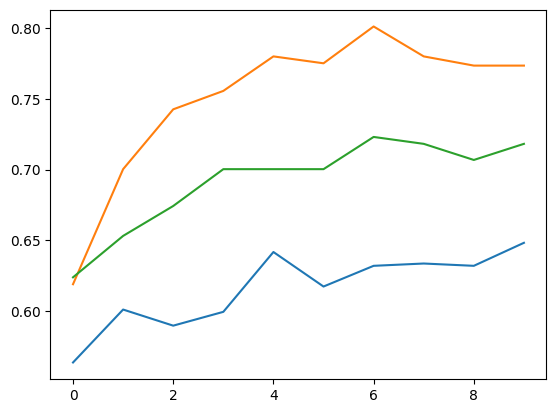

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])

## Optimization method

In [11]:
import tensorflow as tf
from tensorflow import keras
from  keras.layers import Dense, Dropout,Flatten
from keras import Sequential
from keras.datasets import fashion_mnist
import numpy as np

In [12]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train/255.0
x_test = x_test/255.0

## Optimization method

In [15]:
def build_model(optimizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu', input_shape=(28,28,1)))
  model.add(Dropout(0.25))
  model.add(Dense(256,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer=optimizer, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [16]:
# Train the model
optimizers = ['SGD','Adagrad','Adadelta','RMSprop','Adam']

for i in optimizers:
  model = build_model(i)
  history = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4961 - loss: 1.4329 - val_accuracy: 0.7578 - val_loss: 0.6790
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7431 - loss: 0.7370 - val_accuracy: 0.8018 - val_loss: 0.5704
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7843 - loss: 0.6234 - val_accuracy: 0.8163 - val_loss: 0.5225
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8006 - loss: 0.5751 - val_accuracy: 0.8261 - val_loss: 0.4928
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8056 - loss: 0.5433 - val_accuracy: 0.8295 - val_loss: 0.4767
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8204 - loss: 0.5108 - val_accuracy: 0.8378 - val_loss: 0.4570
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8281 - loss: 0.4909 - val_accuracy: 0.8377 - val_loss: 0.4462
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8356 - loss: 0.4691 - val_accuracy: 0

In [ ]:
#SGD
#accuracy: 0.8365 - loss: 0.4696 - val_accuracy: 0.8474 - val_loss: 0.4285

# Adagrad
#accuracy : 0.7736 - loss: 0.6635 - val_accuracy: 0.7998 - val_loss: 0.5734

#adelta
#accuracy: 0.5499 - loss: 1.3985 - val_accuracy: 0.6663 - val_loss: 1.1820

#RMSprop
#accuracy: 0.8734 - loss: 0.3772 - val_accuracy: 0.8707 - val_loss: 0.4028

#Adam
#accuracy: 0.8849 - loss: 0.3090 - val_accuracy: 0.8848 - val_loss: 0.3276